# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

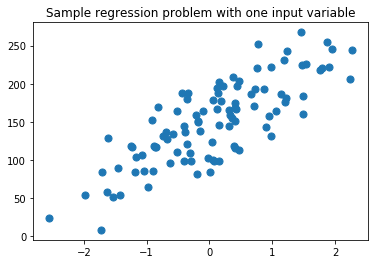

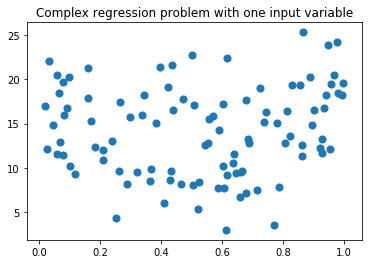

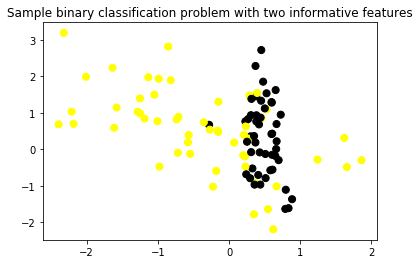

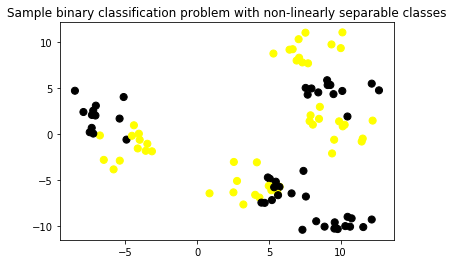

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes Classifiers

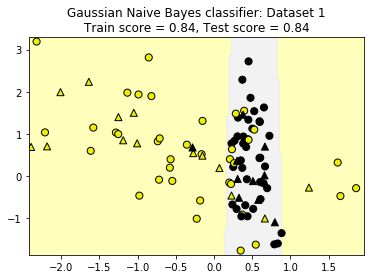

In [2]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

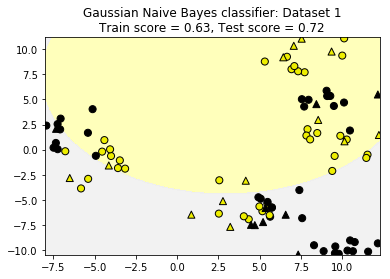

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

### Application to a real-word dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = GaussianNB()
clf.fit(X_train, y_train)
print('Brest cancer dataset')
print('Accuracy of GaussianNB classifier on training data: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test data: {:.2f}'
     .format(clf.score(X_test, y_test)))

Brest cancer dataset
Accuracy of GaussianNB classifier on training data: 0.95
Accuracy of GaussianNB classifier on test data: 0.94


## Ensemble of decision trees

### Random forests

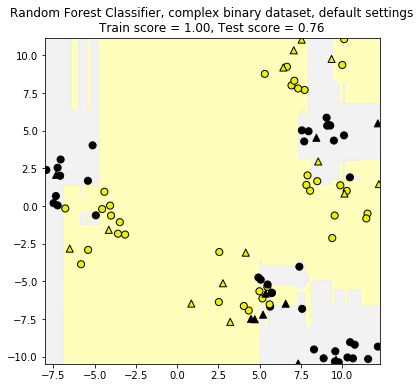

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

### Random Forest: Fruit dataset

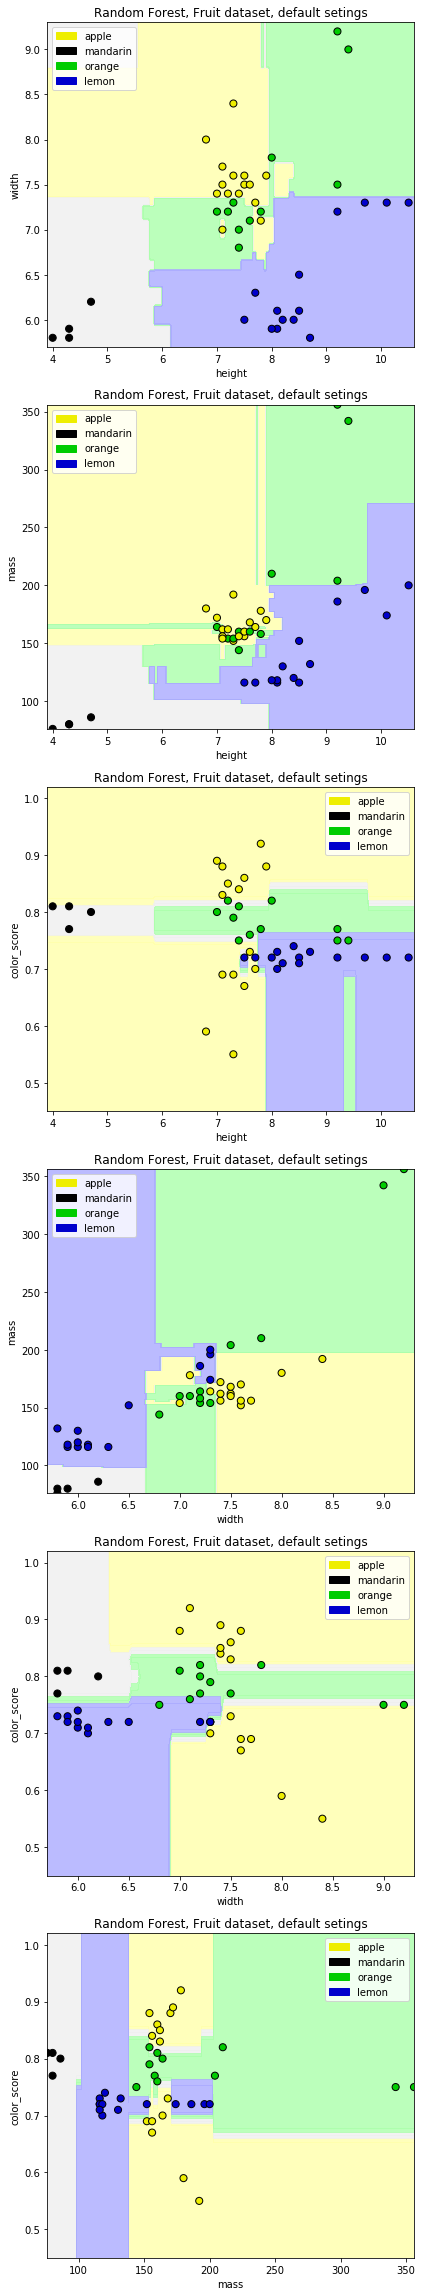

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training data: 1.00
Accuracy of RF classifier on test data: 0.80


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(), y_fruits.as_matrix(), random_state=0)

title = 'Random Forest, Fruit dataset, default setings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

for pair, ax in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    clf = RandomForestClassifier()
    clf.fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, ax,
                                             target_names_fruits)
    
    ax.set_xlabel(feature_names_fruits[pair[0]])
    ax.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators=6, random_state=0)
clf.fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training data: {:.2f}'.
     format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test data: {:.2f}'.
     format(clf.score(X_test, y_test)))

### Random Forest on a real-world dataset

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('Breast Cancer dataset')
print('Accuracy of RF classifier on training data : {:2f}'.
     format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test dataset {:.2f}'.format(clf.score(X_test, y_test)))

Breast Cancer dataset
Accuracy of RF classifier on training data : 0.997653
Accuracy of RF classifier on test dataset 0.96


### Gradient boosted decision trees

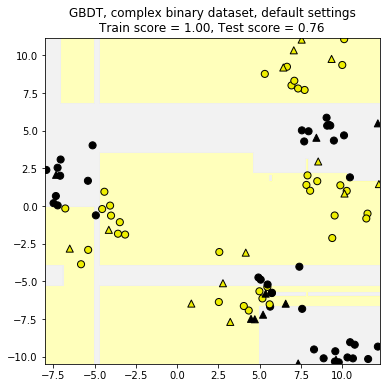

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, axs)

plt.show()

### Gradient boosted decision trees on the fruit dataset

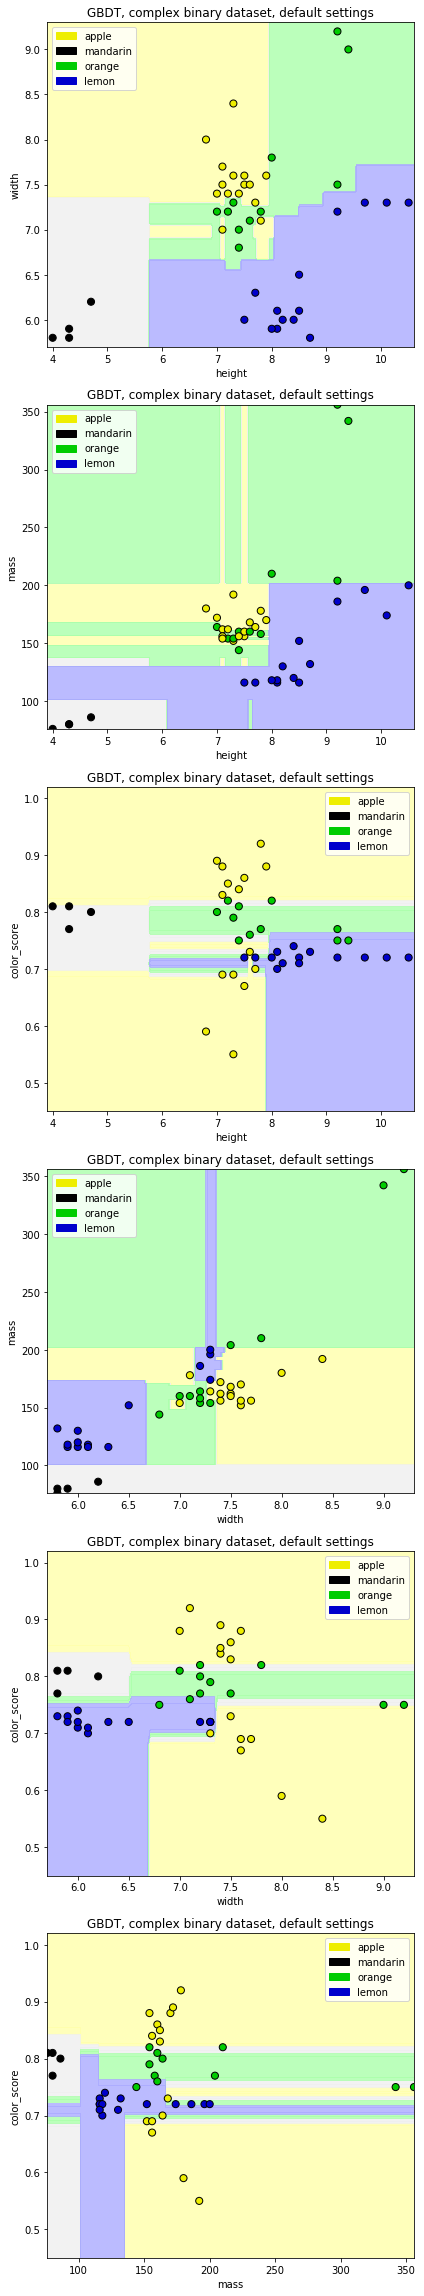

GBDT, fruit dataset, default setting
GBDT accuracy on training data: 1.00
GBDT accuracy on test data: 0.80


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(), y_fruits.as_matrix(), random_state=0)
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

for pair, ax in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, ax,
                                             target_names_fruits)
    
    ax.set_xlabel(feature_names_fruits[pair[0]])
    ax.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print('GBDT, fruit dataset, default setting')
print('GBDT accuracy on training data: {:.2f}'.
     format(clf.score(X_train, y_train)))
print('GBDT accuracy on test data: {:.2f}'.
     format(clf.score(X_test, y_test)))

### Gradient-boosted trees on a real-word dataset

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

print('GBDT, cancer dataset, (learning_rate=0.1, max_depth=3)')
print('GBDT Accuracy on training data: {:.2f}'.
     format(clf.score(X_train, y_train)))
print('GBDT Accuracy on test data: {:.2f}'.
     format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print('GBDT classifier, cancer dataset, (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training data: {:.2f}'.
     format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test data: {:.2f}'.
     format(clf.score(X_test, y_test)))

GBDT, cancer dataset, (learning_rate=0.1, max_depth=3)
GBDT Accuracy on training data: 1.00
GBDT Accuracy on test data: 0.96
GBDT classifier, cancer dataset, (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training data: 0.97
Accuracy of GBDT classifier on test data: 0.97
